Based on https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/

In [30]:
# Production packages
import cv2

# development packages
import matplotlib.pyplot as plt

# Global flags
FLAG_EXPORT = True

# Global variables
path_out = 'assets/'

In [3]:
class ShapeDetector:
	def __init__(self# loop over the contours

	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        
		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape

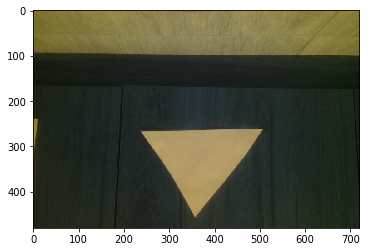

In [26]:
image = cv2.imread("image2.jpg")
plt.imshow(image)

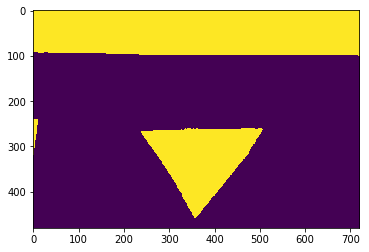

In [27]:
#resized = imutils.resize(image, width=300)
#ratio = image.shape[0] / float(resized.shape[0])

# convert the resized image to grayscale, blur it slightly, and threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh)

In [44]:
i=0
sd = ShapeDetector()
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Biggest shape=rectangle
Area=69640.0


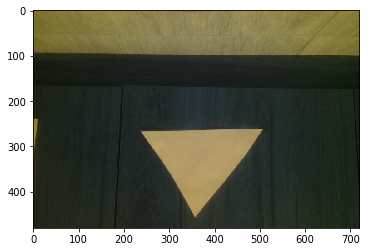

In [50]:
# Just biggest
if len(contours) != 0:
    c = max(contours, key = cv2.contourArea) #find the biggest area
    M = cv2.moments(c)
    shape = sd.detect(c)
    print("Biggest shape=" + shape + "\nArea=" + str(cv2.contourArea(c)))
else:
    shape='none'
plt.imshow(image)
if FLAG_EXPORT: plt.savefig(path_out + 'img' + str(i) + '_' + shape + '.jpg')

Shape 0=triangle		 Area=26861.5
Shape 1=triangle		 Area=427.0
Shape 2=rectangle		 Area=69640.0


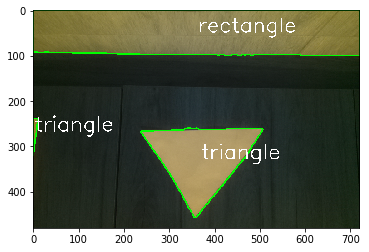

In [47]:
## DETECT ALL SHAPES
img_labels = image.copy()
n=0
for c in contours:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / (M["m00"]+1)))
    cY = int((M["m01"] / (M["m00"]+1)))
    shape = sd.detect(c)
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the img_labels
    #c = c.astype("float")
    #c *= ratio
    #c = c.astype("int")
    cv2.drawContours(img_labels, [c], -1, (0, 255, 0), 2)
    cv2.putText(img_labels, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (255, 255, 255), 2)
    # show the output img_labels
    #cv2.imshow("img_labels", img_labels)
    #cv2.waitKey(0)
    print('Shape ' + str(n) + '=' + shape + "\t\t Area=" + str(cv2.contourArea(c)))
    n+=1
plt.imshow(img_labels)
if FLAG_EXPORT: plt.savefig(path_out + 'img' + str(i) + '_labels.jpg')